In [ ]:
import gdown

url = 'https://drive.google.com/drive/folders/14q8IBbS7ZIhjrr9ejj3xPDPKCRef-eDv?usp=sharing'

gdown.download_folder(url)

Retrieving folder list


Processing file 16GMWf2VIRh2RGxL2wrgTyUaTN088Ck7W imagenet_class_index.json
Processing file 1kQZjWV38K1VIz0j-amhCxKEQ_GECIP5I inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
Processing file 1MoPOoXsTQqDgCA6HJdviLJBgVw93qPzX inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5
Processing file 1HIda-NEiONqk3kMIbbLYk7fw-BLeU1g8 inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Processing file 1kx80EL8C7nLN6iyj691u5kHGpkJFrgOd inception_v3_weights_tf_dim_ordering_tf_kernels.h5
Processing file 1qjsSenqA-QkQrRsqS4DPJiKq_Ejuhggf Kuszma.JPG
Processing file 1TzeeB0ca09C4ben4Q50adKQjkfwdkrep resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
Processing file 1VJPzarx68NPSncdmA3qKTmquinM7rOEc resnet50_weights_tf_dim_ordering_tf_kernels.h5
Processing file 1nEZ5w_nLNcTMiL_xJRpdH2ZbJYqgkEdQ vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
Processing file 1YmyCnticJ4-4RXfnxtCwAqxA6z56DTre xception_weights_tf_dim_ordering_tf_kernels_notop.h5
Processing file 1KBT8YKdjxik2h

Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=16GMWf2VIRh2RGxL2wrgTyUaTN088Ck7W
To: /content/keras_pretrained/imagenet_class_index.json
100%|██████████| 35.4k/35.4k [00:00<00:00, 17.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kQZjWV38K1VIz0j-amhCxKEQ_GECIP5I
To: /content/keras_pretrained/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
100%|██████████| 219M/219M [00:04<00:00, 53.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MoPOoXsTQqDgCA6HJdviLJBgVw93qPzX
To: /content/keras_pretrained/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5
100%|██████████| 225M/225M [00:03<00:00, 57.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HIda-NEiONqk3kMIbbLYk7fw-BLeU1g8
To: /content/keras_pretrained/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
100%|██████████| 87.9M/87.9M [00:01<00:00, 52.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kx80EL8C

['/content/keras_pretrained/imagenet_class_index.json',
 '/content/keras_pretrained/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5',
 '/content/keras_pretrained/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5',
 '/content/keras_pretrained/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
 '/content/keras_pretrained/inception_v3_weights_tf_dim_ordering_tf_kernels.h5',
 '/content/keras_pretrained/Kuszma.JPG',
 '/content/keras_pretrained/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
 '/content/keras_pretrained/resnet50_weights_tf_dim_ordering_tf_kernels.h5',
 '/content/keras_pretrained/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
 '/content/keras_pretrained/xception_weights_tf_dim_ordering_tf_kernels_notop.h5',
 '/content/keras_pretrained/xception_weights_tf_dim_ordering_tf_kernels.h5']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install visualkeras
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=f5e2a86336925c92a9289c13fb6c0b31bf3618b94277d73bbfcbb58c64b0e07e
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



import os
from keras.applications import xception
from keras.preprocessing import image

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import cv2

from tqdm import tqdm
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, Input, Masking, Dropout, Flatten
from tensorflow.python.keras.utils import np_utils
from keras.utils import to_categorical

In [ ]:
#copying the pretrained models to the cache directory
cache_dir = os.path.expanduser(os.path.join('~', '.keras'))
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
models_dir = os.path.join(cache_dir, 'models')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

#copy the Xception models
!cp /content/keras_pretrained/xception* ~/.keras/models/
#show
!ls ~/.keras/models

xception_weights_tf_dim_ordering_tf_kernels.h5
xception_weights_tf_dim_ordering_tf_kernels_notop.h5


In [ ]:
data_folder = '/content/drive/MyDrive/fire_dataset'
train_data_folder = '/content/drive/MyDrive/fire_dataset/fire_images'
test_date_folder  = '/content/drive/MyDrive/fire_dataset/non_fire_images'

categories = ['fire_images', 'non_fire_images']
len_categories = len(categories)

In [ ]:
image_count = {}
train_data = []

for i , category in tqdm(enumerate(categories)):
    class_folder = os.path.join(data_folder, category)
    label = category
    image_count[category] = []

    for path in os.listdir(os.path.join(class_folder)):
        image_count[category].append(category)
        train_data.append(['{}/{}'.format(category, path), i, category])

2it [00:06,  3.07s/it]


In [ ]:
#show image count
for key, value in image_count.items():
    print('{0} -> {1}'.format(key, len(value)))

fire_images -> 755
non_fire_images -> 244


In [ ]:
#create a dataframe
df = pd.DataFrame(train_data, columns=['file', 'id', 'label'])
df.shape
df.head()

,file,id,label
0,fire_images/fire.10.png,0,fire_images
1,fire_images/fire.13.png,0,fire_images
2,fire_images/fire.129.png,0,fire_images
3,fire_images/fire.122.png,0,fire_images
4,fire_images/fire.141.png,0,fire_images


In [ ]:
#masking function
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_hsv = np.array([0,0,250])
    upper_hsv = np.array([250,255,255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return mask

#image segmentation function
def segment_image(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output/255

#sharpen the image
def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

# function to get an image
def read_img(filepath, size):
    img = image.load_img(os.path.join(data_folder, filepath), target_size=size)
    #convert image to array
    img = image.img_to_array(img)
    return img

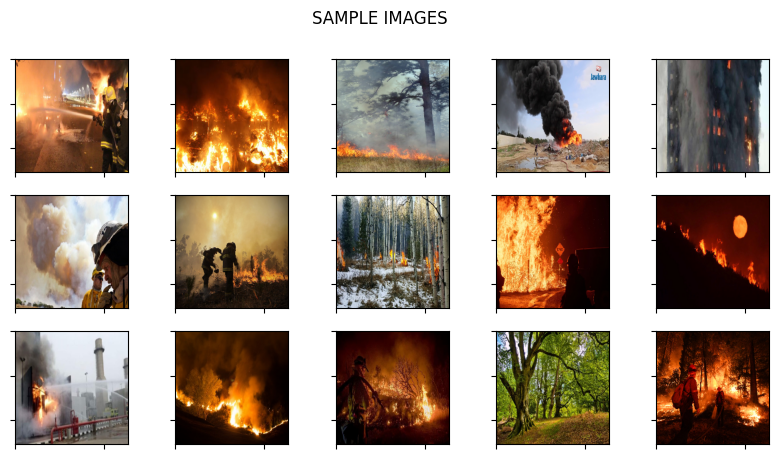

In [ ]:
nb_rows = 3
nb_cols = 5
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 5));
plt.suptitle('SAMPLE IMAGES');
for i in range(0, nb_rows):
    for j in range(0, nb_cols):
        axs[i, j].xaxis.set_ticklabels([]);
        axs[i, j].yaxis.set_ticklabels([]);
        axs[i, j].imshow((read_img(df['file'][np.random.randint(1000)], (255,255)))/255.);
plt.show();

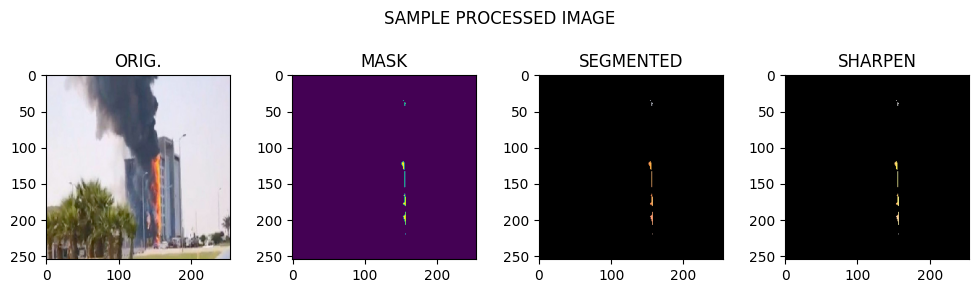

In [ ]:
#get an image
img = read_img(df['file'][102],(255,255))
#mask
image_mask = create_mask_for_plant(img)
#segmentation
image_segmented = segment_image(img)
#sharpen the image
image_sharpen = sharpen_image(image_segmented)

fig, ax = plt.subplots(1, 4, figsize=(10, 5))
plt.suptitle('SAMPLE PROCESSED IMAGE', x=0.5, y=0.8)
plt.tight_layout()

ax[0].set_title('ORIG.', fontsize=12)
ax[1].set_title('MASK', fontsize=12)
ax[2].set_title('SEGMENTED', fontsize=12)
ax[3].set_title('SHARPEN', fontsize=12)

ax[0].imshow(img/255)
ax[1].imshow(image_mask)
ax[2].imshow(image_segmented)
ax[3].imshow(image_sharpen)

plt.show()


In [ ]:
# Data augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
INPUT_SIZE=255

##preprocess the input
X_train = np.zeros((len(df), INPUT_SIZE, INPUT_SIZE, df.shape[1]), dtype='float')
for i, file in tqdm(enumerate(df['file'])):
    #read image
    img = read_img(file,(INPUT_SIZE,INPUT_SIZE))
    #masking and segmentation
    image_segmented = segment_image(img)
    #sharpen
    image_sharpen = sharpen_image(image_segmented)
    x = xception.preprocess_input(np.expand_dims(image_sharpen.copy(), axis=0))
    X_train[i] = x

999it [07:36,  2.19it/s]


In [ ]:
print('Train Image Shape: ', X_train.shape)
print('Train Image Size: ', X_train.size)

Train Image Shape:  (999, 255, 255, 3)
Train Image Size:  194879925


In [ ]:
y = df['id']
train_x, train_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=101)

print('FIRE IMAGES ON TRAINING DATA: ',y_train[y_train==0].shape[0])
print('NON-FIRE IMAGES ON TRAINING DATA: ',y_train[y_train==1].shape[0])


FIRE IMAGES ON TRAINING DATA:  610
NON-FIRE IMAGES ON TRAINING DATA:  189


In [ ]:
# Create data generators
batch_size = 32
train_generator = train_datagen.flow(train_x, y_train, batch_size=batch_size)

In [ ]:
##get the features
xception_bf = xception.Xception(weights='imagenet', include_top=False, pooling='avg')
bf_train_x = xception_bf.predict(train_x, batch_size=32, verbose=1)
bf_train_val = xception_bf.predict(train_val, batch_size=32, verbose=1)

7/7 [==============================] - 2s 260ms/step


In [ ]:
#print shape of feature and size
print('Train Shape: ', bf_train_x.shape)
print('Train Size: ', bf_train_x.size)

print('Validation Shape: ', bf_train_val.shape)
print('Validation Size: ', bf_train_val.size)

Train Shape:  (799, 2048)
Train Size:  1636352
Validation Shape:  (200, 2048)
Validation Size:  409600


In [ ]:
#keras Sequential model
model = Sequential()
model.add(Dense(units = 256 , activation = 'relu', input_dim=bf_train_x.shape[1]))
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))\

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 541057 (2.06 MB)
Trainable params: 541057 (2.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


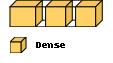

In [ ]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [ ]:
#train the model @ 100 epochs
history = model.fit(bf_train_x, y_train, epochs=50, batch_size=32);

Epoch 1/50
25/25 [==============================] - 2s 4ms/step - loss: 0.5428 - accuracy: 0.7384
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.7722
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4004 - accuracy: 0.8323
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3710 - accuracy: 0.8298
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.8398
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3399 - accuracy: 0.8436
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.8698
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3060 - accuracy: 0.8611
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2905 - accuracy: 0.8698
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2886 - accuracy: 0.8673
Epoch 11/50
25/25 [

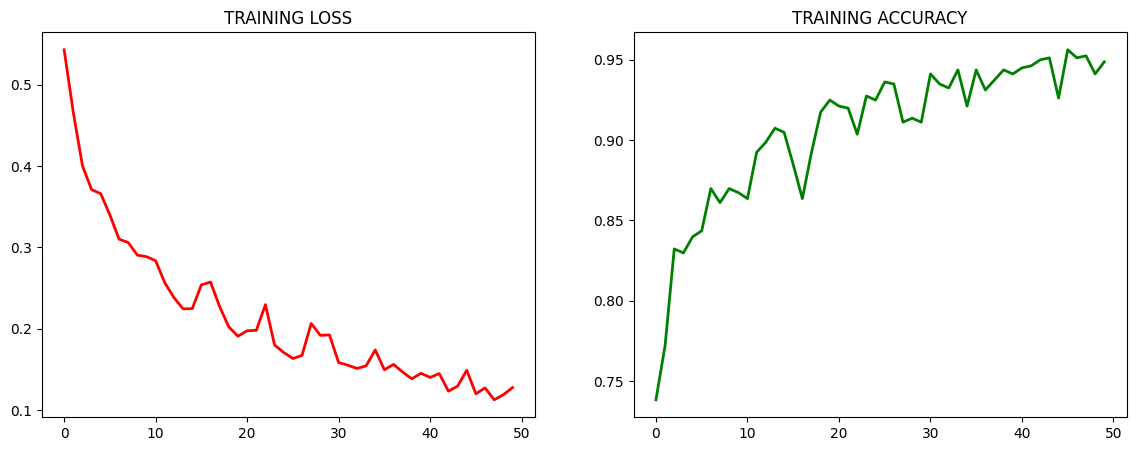

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].set_title('TRAINING LOSS');
ax[1].set_title('TRAINING ACCURACY');


ax[0].plot(history.history['loss'], color= 'red',lw=2);
ax[1].plot(history.history['accuracy'], color= 'green',lw=2);

In [ ]:
# Predict using the model
predictions = model.predict(bf_train_val)
predicted_classes = predictions.argmax(axis=-1)

7/7 [==============================] - 0s 13ms/step


In [ ]:
threshold = 0.5  # Adjust the threshold based on your problem
binary_predictions = np.where(predictions > threshold, 1, 0)

print(classification_report(y_val, binary_predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       145
           1       0.75      0.78      0.77        55

    accuracy                           0.87       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.87      0.87      0.87       200



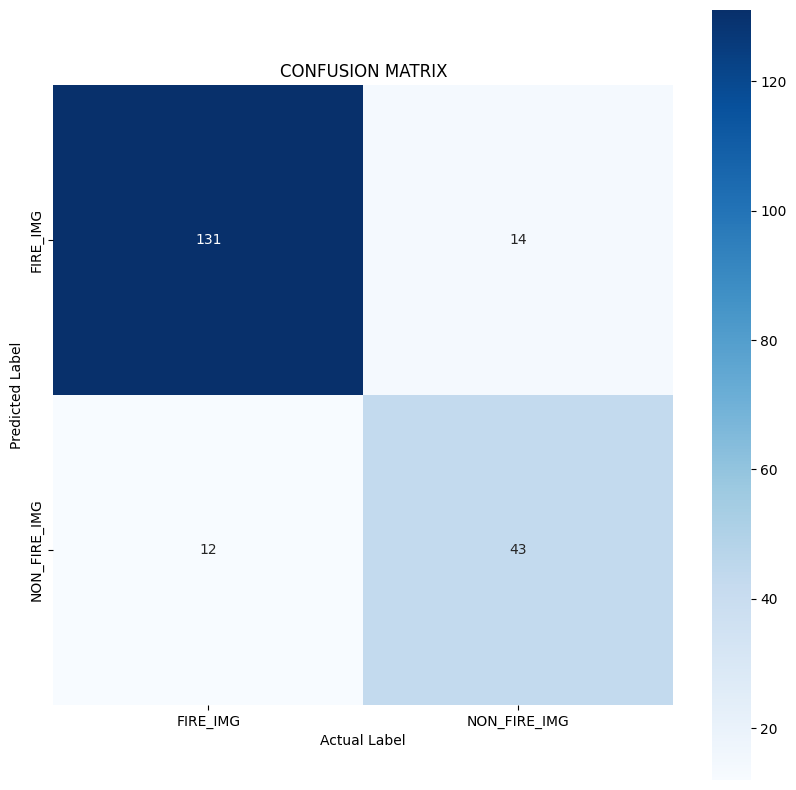

In [ ]:
# Compute confusion matrix
confusion_mat = confusion_matrix(y_val, binary_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_mat, square=True, annot=True,
            fmt='d',  # Display numbers as integers
            yticklabels=['FIRE_IMG', 'NON_FIRE_IMG'],
            xticklabels=['FIRE_IMG', 'NON_FIRE_IMG'],
            cmap="Blues")

plt.title('CONFUSION MATRIX')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [ ]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(bf_train_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8700
Validation Accuracy: 87.00%
